![insomnia](insomnia.jpg)


Your client, SleepInc, has shared anonymized sleep data from their hot new sleep tracking app SleepScope. As their data science consultant, your mission is to analyze the lifestyle survey data with Python to discover relationships between exercise, gender, occupation, and sleep quality. See if you can identify patterns leading to insights on sleep quality.

## 💾 The data: sleep_health_data.csv

SleepInc has provided you with an anonymized dataset of sleep and lifestyle metrics for 374 individuals. This dataset contains average values for each person calculated over the past six months. The data is saved as `sleep_health_data.csv`.

The dataset includes 13 columns covering sleep duration, quality, disorders, exercise, stress, diet, demographics, and other factors related to sleep health. 

| Column | Description |
|---------|----------------------------------------|  
| `Person ID` | An identifier for each individual. |
| `Gender` | The gender of the person (Male/Female). |  
| `Age` | The age of the person in years. |
| `Occupation` | The occupation or profession of the person. |
| `Sleep Duration (hours)` | The average number of hours the person sleeps per day. |
| `Quality of Sleep (scale: 1-10)` | A subjective rating of the quality of sleep, ranging from 1 to 10. |
| `Physical Activity Level (minutes/day)` | The average number of minutes the person engages in physical activity daily. |  
| `Stress Level (scale: 1-10)` | A subjective rating of the stress level experienced by the person, ranging from 1 to 10. |
| `BMI Category` | The BMI category of the person (e.g., Underweight, Normal, Overweight). |
| `Blood Pressure (systolic/diastolic)` | The average blood pressure measurement of the person, indicated as systolic pressure over diastolic pressure. |
| `Heart Rate (bpm)` | The average resting heart rate of the person in beats per minute. |
| `Daily Steps` | The average number of steps the person takes per day. |
| `Sleep Disorder` | The presence or absence of a sleep disorder in the person (None, Insomnia, Sleep Apnea). |

# Sleep Health Data Analysis
## Introduction

This notebook analyzes a dataset on sleep health. The goal is to understand sleep duration and quality patterns across different occupations, and to identify which occupations tend to have the lowest averages. By using Python libraries such as Pandas, NumPy, Seaborn, and Matplotlib, we can organize, analyze, and visualize the data to draw meaningful conclusions.

# 1. Importing Libraries
- Purpose: Load the essential libraries for data analysis.
- pandas for data manipulation.
- numpy for numerical operations.
- seaborn and matplotlib for data visualization.

In [1]:
# Start coding here
# Use as many cells as you need
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Loading the Dataset
- Purpose: Read the dataset into a DataFrame and display the first 10 rows.
- This allows us to check the structure, columns, and ensure the data has loaded correctly.

In [2]:
sleep_health_data = pd.read_csv("sleep_health_data.csv")
sleep_health_data.head(10)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None
9,10,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None


# 3. Average Sleep Duration by Occupation
- Purpose: Calculate the average sleep duration for each occupation.
- Then, sort the results in ascending order to identify occupations with the lowest average sleep time.


## Data Visualization
- Sales rep have the lowest average sleep duration.

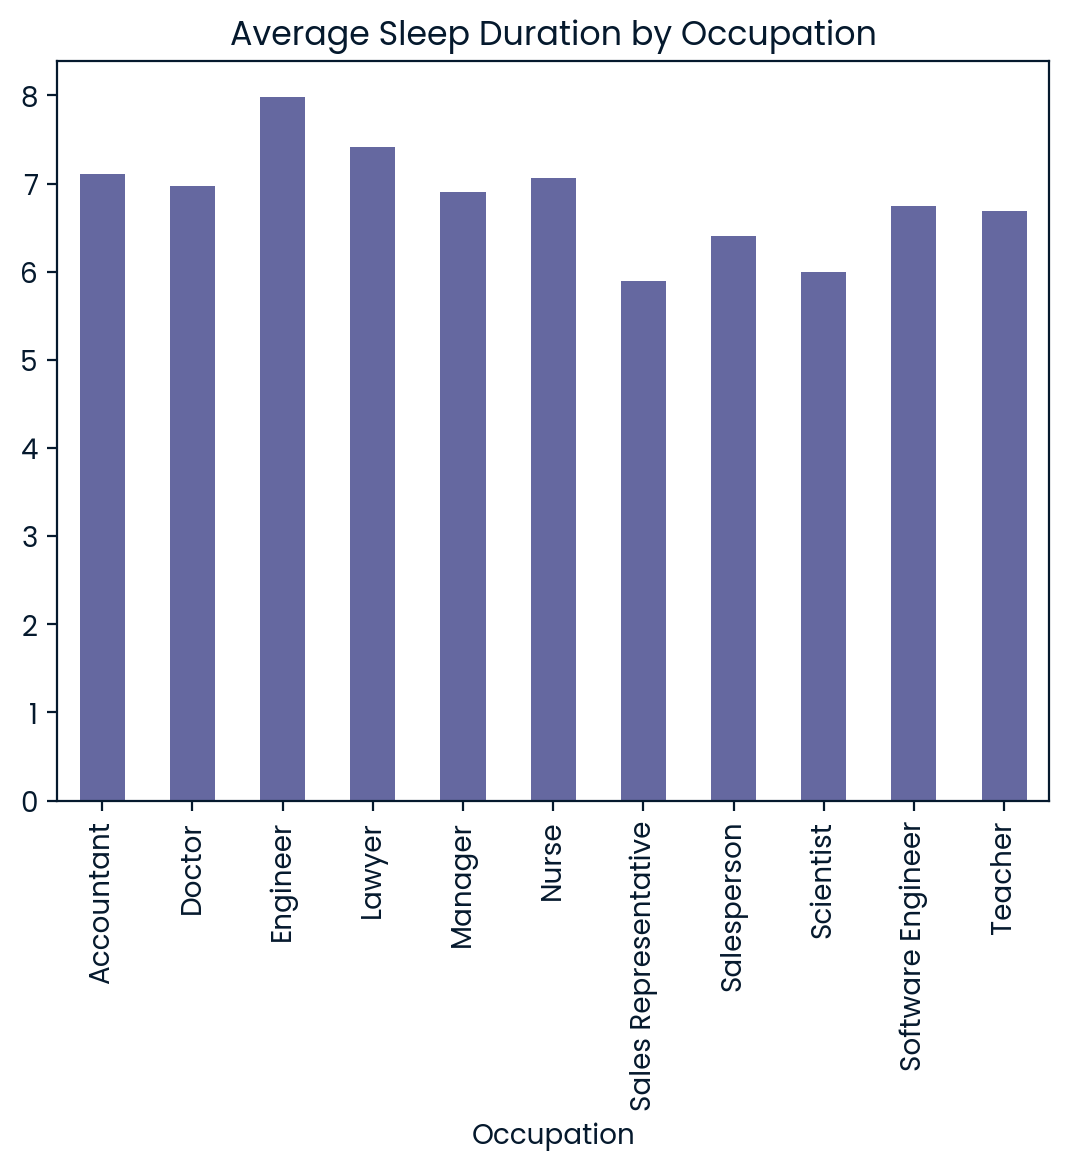

In [16]:
mean_sleep_data = sleep_health_data.groupby("Occupation")["Sleep Duration"].mean()
sorted_mean_sleep = mean_sleep_data.sort_values(ascending = True)

mean_sleep_data.plot(x='Occupation', y = "Sleep Duration", kind = "bar",title = "Average Sleep Duration by Occupation")
plt.show()


# 4. Occupation with Lowest Sleep Duration
- Purpose: Extract the occupation with the lowest sleep duration.
- This helps pinpoint which profession tends to sleep the least on average.

In [4]:
lowest_sleep_occ = sorted_mean_sleep.index[0]
lowest_sleep_occ

'Sales Representative'

# 5. Comparing Sleep Quality
1. Purpose:
   - Compute the average sleep quality per occupation.
   - Identify which occupation has the lowest sleep quality.
   - Check if the occupation with the lowest sleep quality is the same as the one with the lowest sleep duration.

2. The last line (same_occ) returns True if both are the same occupation, otherwise False.

In [5]:
mean_sleep_quality_occ = sleep_health_data.groupby("Occupation")["Quality of Sleep"].mean()
lowest_sleep_quality_occ = mean_sleep_quality_occ.sort_values(ascending = True).index[0]
lowest_sleep_quality_occ

same_occ = lowest_sleep_quality_occ == lowest_sleep_occ
same_occ


True

## Data Visualization
- Sales rep is seen to have the lowest quality of sleep
- 2nd lowest is scientist

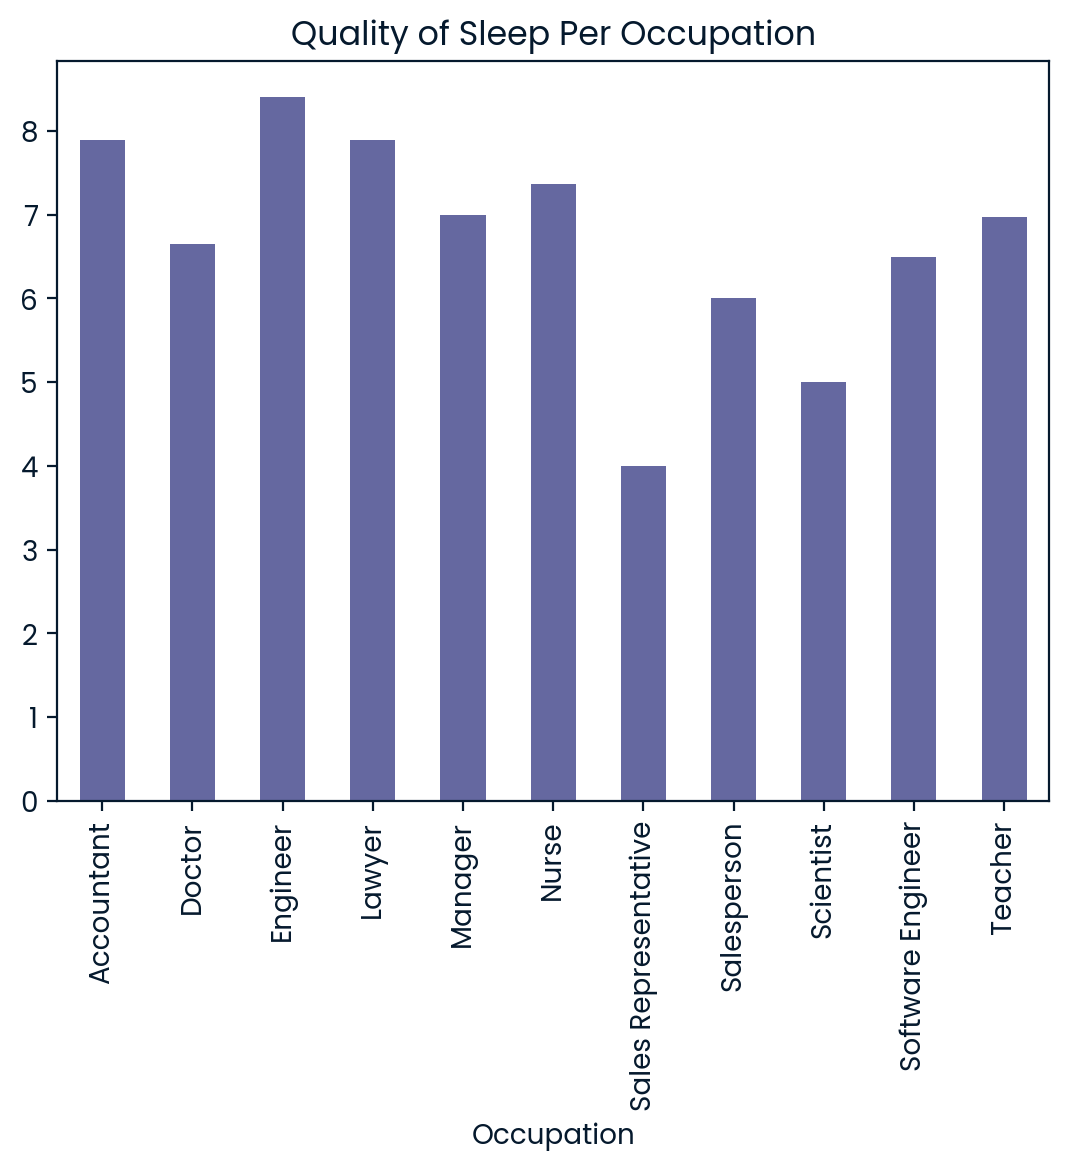

In [15]:
mean_sleep_quality_occ.plot(x = "Occupation", y = "Quality of Sleep", kind = "bar", title = "Quality of Sleep Per Occupation")
plt.show()

# 6. Preparing a BMI–Insomnia Ratio Dictionary
- Create a dictionary to store ratios of insomnia prevalence for each BMI category.
- Keys represent BMI categories, values will later be filled with calculated ratios.

In [6]:
bmi_insomnia_ratios = {
    "Normal" : float,
    "Overweight" : float,
    "Obese" : float
}

# 7. Filtering Insomnia Cases
- Filter the dataset to include only users diagnosed with Insomnia.
- This subset will be used for ratio calculations.

In [7]:
user_insomnia = sleep_health_data[sleep_health_data["Sleep Disorder"] == "Insomnia"]
user_insomnia

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
18,19,Female,29,Nurse,6.5,5,40,7,Normal,132/87,80,4000,Insomnia
31,32,Female,30,Nurse,6.4,5,35,7,Normal,130/86,78,4100,Insomnia
67,68,Male,33,Doctor,6.0,6,30,8,Normal,125/80,72,5000,Insomnia
...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,309,Female,52,Accountant,6.6,7,45,7,Overweight,130/85,72,6000,Insomnia
309,310,Female,52,Accountant,6.6,7,45,7,Overweight,130/85,72,6000,Insomnia
310,311,Female,52,Accountant,6.6,7,45,7,Overweight,130/85,72,6000,Insomnia
311,312,Female,52,Accountant,6.6,7,45,7,Overweight,130/85,72,6000,Insomnia


# 8. Insomnia Ratio for Normal BMI
- Count the total individuals with Normal BMI.

- Count how many of them also have Insomnia.

- Calculate and store the ratio:Insomnia Ratio (Normal BMI)
![image](image.png)
	​


In [10]:
total_bmi_normal = len(sleep_health_data[sleep_health_data["BMI Category"] == 'Normal'])
total_bmi_normal

bmi_normal_insomnia = sleep_health_data[(sleep_health_data["BMI Category"] == 'Normal') & (sleep_health_data["Sleep Disorder"] == 'Insomnia')]
num_normal_insomnia = len(bmi_normal_insomnia)
num_normal_insomnia

bmi_insomnia_ratios["Normal"] = round((num_normal_insomnia / total_bmi_normal),2)

# 9. Insomnia Ratio for Overweight BMI
- Repeat the process for Overweight BMI category.
- Store the insomnia prevalence ratio in the dictionary.

In [11]:
total_bmi_overweight = len(sleep_health_data[sleep_health_data["BMI Category"] == 'Overweight'])
total_bmi_overweight

bmi_overweight_insomnia = sleep_health_data[(sleep_health_data["BMI Category"] == 'Overweight') & (sleep_health_data["Sleep Disorder"] == 'Insomnia')]
num_overweight_insomnia = len(bmi_overweight_insomnia)
num_overweight_insomnia

bmi_insomnia_ratios['Overweight'] = round((num_overweight_insomnia / total_bmi_overweight),2)

# 10. Insomnia Ratio for Obese BMI
- Repeat the process for Obese BMI category.
- Calculate insomnia ratio for obese individuals and store it.

In [12]:
total_bmi_obese = len(sleep_health_data[sleep_health_data["BMI Category"] == 'Obese'])
total_bmi_obese

bmi_obese_insomnia = sleep_health_data[(sleep_health_data["BMI Category"] == 'Obese') & (sleep_health_data["Sleep Disorder"] == 'Insomnia')]
num_obese_insomnia = len(bmi_obese_insomnia)
num_obese_insomnia

bmi_insomnia_ratios['Obese'] = round((num_obese_insomnia / total_bmi_obese),2)
bmi_insomnia_ratios

{'Normal': 0.04, 'Overweight': 0.43, 'Obese': 0.4}

## Data Visualization
- Based on visualization below, we can see that there is high correlation between BMI levels and Insomnia.

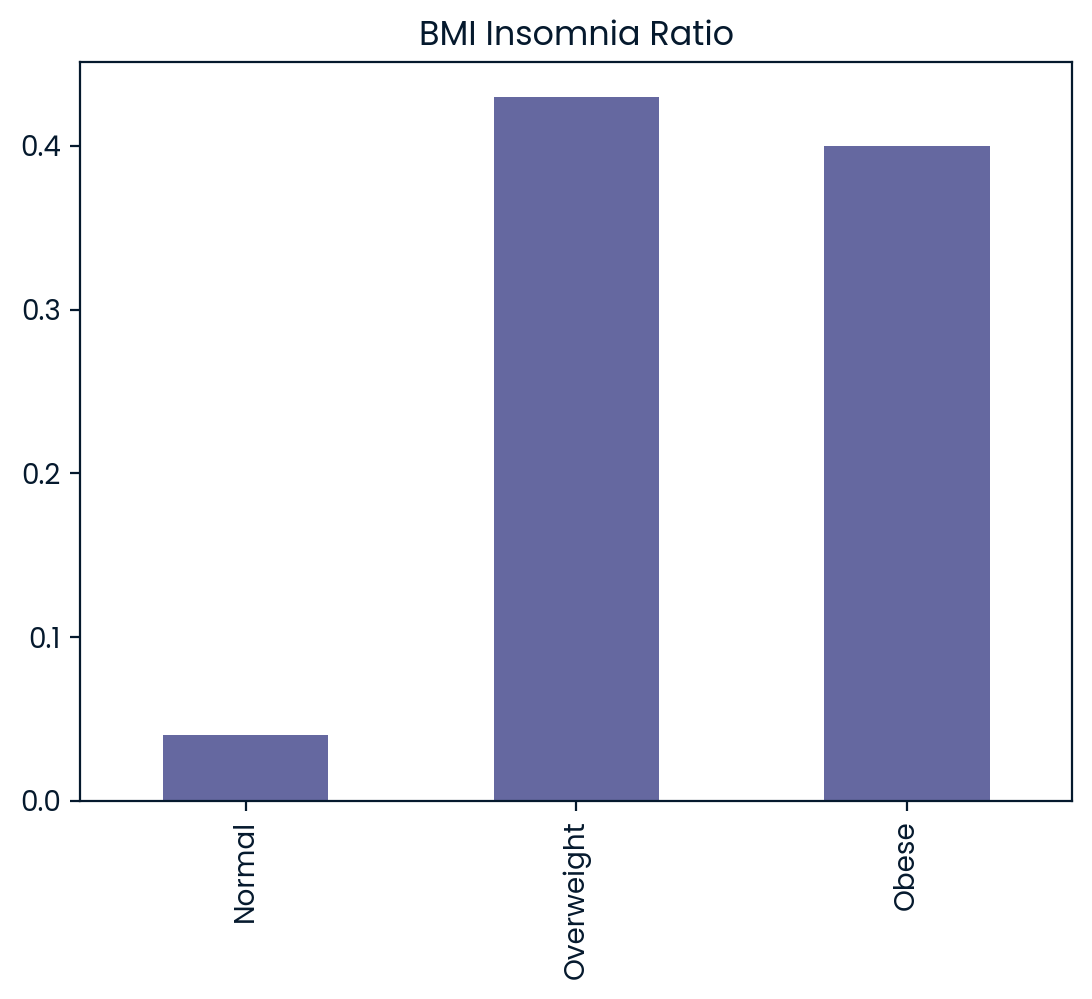

In [20]:
conv_bmi_insom_ratios = pd.Series(bmi_insomnia_ratios)

conv_bmi_insom_ratios.plot(kind = "bar", title = "BMI Insomnia Ratio")
plt.show()                  

# Conclusion

Through this analysis:
 - We successfully loaded and explored the sleep health dataset.
 - Calculated average sleep duration and sleep quality by occupation.
 - Identified the occupations most affected by poor sleep habits.
 - Compared whether the same occupation suffers from both shortest sleep duration and lowest sleep quality.

This type of analysis can provide valuable insights for workplace health studies and targeted interventions to improve employee well-being.